In [2]:
# Add project root to Python path so sees me module
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)


In [249]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.div_harvest import cal_div_harvest
from src.plot_utils import *
from src.utils import download_and_cache_data

# Download data

In [31]:
asx = pd.read_csv('data/asx200.csv')
asx200_tickers = asx['ticker'].tolist()
data = download_and_cache_data(asx200_tickers, period="20y", cache_filename='data/asx200_data.csv')

$ABC.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$ABP.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$ALU.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$APT.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$AST.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$AWC.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$BIN.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$BLD.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$CIM.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$CSR.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$CWN.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$GXY.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$LNK.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$MGF.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$MLT.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$NCM.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$ORE.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$OSH.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$OZL.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$PDL.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$SKI.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$SLK.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$SVW.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$SYD.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$TLT.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$VOC.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$VUK.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$WPL.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$Z1P.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


/tmp/ipykernel_663/1133792755.py:21: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df = pd.concat(all_data)


Data saved to data/asx200_data.csv.


In [ ]:
with open('data/nzx50.txt', 'r') as file:
    # Read each line, remove extra whitespace/newlines, and filter out any empty lines
    nzx50_tickers = [line.strip() for line in file if line.strip()]

print(nzx50_tickers)

data_nz = download_and_cache_data(nzx50_tickers, period="20y", cache_filename='data/nzx50_data.csv')

# ASX200 Analysis

In [4]:
# Load data from csv
df_asx200 = pd.read_csv('../data/asx200_data.csv', index_col=0)

# Convert the index to datetime with UTC; this forces the datetime to be tz-aware initially.
df_asx200.index = pd.to_datetime(df_asx200.index, utc=True)

# Then convert to tz-naive by dropping the timezone.
df_asx200.index = df_asx200.index.tz_convert('UTC').tz_localize(None)

# Verify that the index is now tz-naive.
assert df_asx200.index.tz is None, f"Index timezone is not None: {df_asx200.index.tz}"

In [ ]:
# Short list of ASX200 tickers
asx_tickers = [
    "BHP.AX", "CBA.AX", "WBC.AX", "ANZ.AX", "NAB.AX", "TLS.AX", "WES.AX"
]

In [199]:
# Full list of ASX200 tickers
asx = pd.read_csv('../data/asx200.csv')
asx_tickers = asx['ticker'].tolist()

In [237]:
bssr = 0.5
investment = 1000
trading_fee = 3

results_profit_ax, results_pct_ax, results_trades_ax = cal_div_harvest(asx_tickers, period="20y", bssr=bssr, data=df_asx200, investment=investment, trading_fee=trading_fee)

# Convert the dictionary of dictionaries into a DataFrame.
# The outer keys (tickers) will be the rows and the inner keys (years) become columns.


Processing A2M.AX...
  No dividend events for A2M.AX.
Processing AAA.AX...
Processing ABC.AX...
  No historical data for ABC.AX.
Processing ABP.AX...
  No historical data for ABP.AX.
Processing AFI.AX...
Processing AGL.AX...
Processing AIA.AX...
Processing ALD.AX...
Processing ALL.AX...
Processing ALQ.AX...
Processing ALU.AX...
  No historical data for ALU.AX.
Processing ALX.AX...
Processing AMC.AX...
Processing AMP.AX...
Processing ANN.AX...
Processing ANZ.AX...
Processing APA.AX...
Processing APE.AX...
Processing APT.AX...
  No historical data for APT.AX.
Processing APX.AX...
Processing ARB.AX...
Processing ARG.AX...
Processing AST.AX...
  No historical data for AST.AX.
Processing ASX.AX...
Processing AWC.AX...
  No historical data for AWC.AX.
Processing AZJ.AX...
Processing BAP.AX...
Processing BEN.AX...
Processing BGA.AX...
Processing BHP.AX...
Processing BIN.AX...
  No historical data for BIN.AX.
Processing BKW.AX...
Processing BLD.AX...
  No historical data for BLD.AX.
Processing

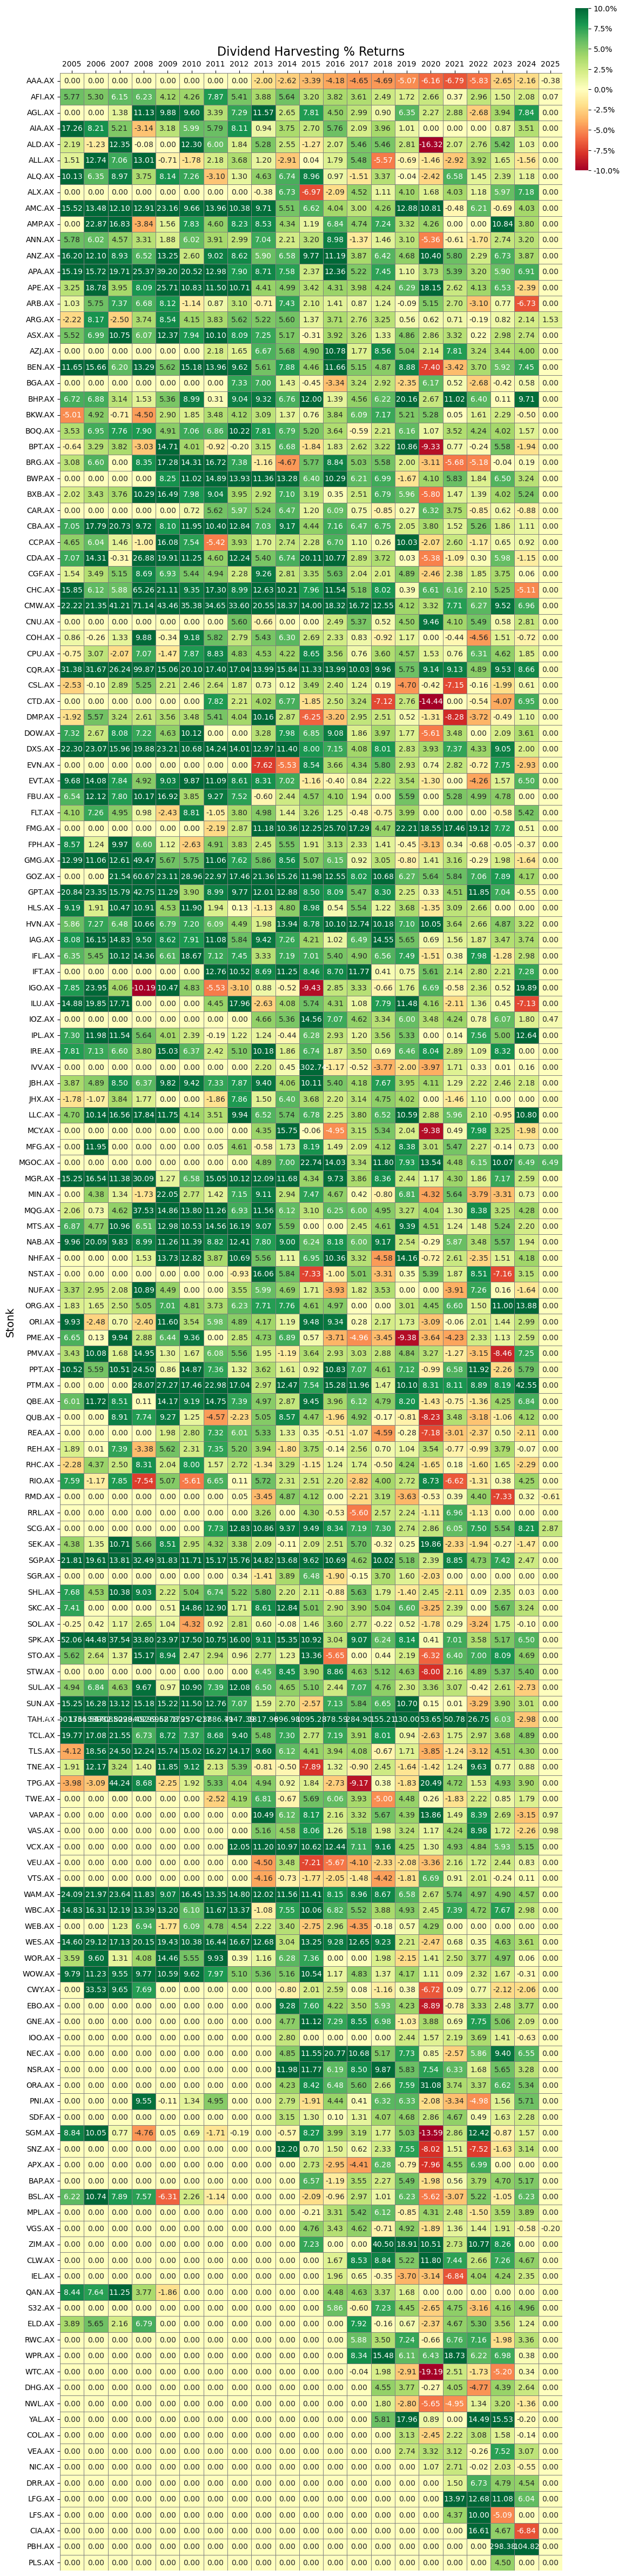

In [238]:
plot_heatmap(df=results_pct_ax, figsize=(12, 60), cbar_fixed_height_in=3)

In [239]:
results_trades_ax.head()


ex_div_date            buy_date           sell_date  buy_price  \
0 2013-01-01 13:00:00 2012-12-30 13:00:00 2013-01-02 13:00:00  37.526656   
1 2013-01-31 13:00:00 2013-01-30 13:00:00 2013-02-03 13:00:00  37.657203   
2 2013-02-28 13:00:00 2013-02-27 13:00:00 2013-03-03 13:00:00  37.763925   
3 2013-04-01 13:00:00 2013-03-27 13:00:00 2013-04-02 13:00:00  37.877765   
4 2013-04-30 14:00:00 2013-04-29 14:00:00 2013-05-01 14:00:00  38.009765   

   sell_price  dividend  investment     shares  sell_proceeds  total_dividend  \
0   37.541055  0.164236        1000  26.567782     994.382560        4.363386   
1   37.666183  0.166942        1000  26.475679     994.237756        4.419903   
2   37.779725  0.150905        1000  26.400858     994.417132        3.984021   
3   37.903844  0.164462        1000  26.321511     994.686451        4.328888   
4   38.015679  0.162754        1000  26.230102     994.155148        4.269054   

     profit  pct_return  year  ticker  
0 -1.254054   -0.125405  2013  AAA.AX  
1 -1.342341   -0.134234  2013  AAA.AX  
2 -1.598847   -0.159885  2013  AAA.AX  
3 -0.984660   -0.098466  2013  AAA.AX  
4 -1.575798   -0.157580  2013  AAA.AX

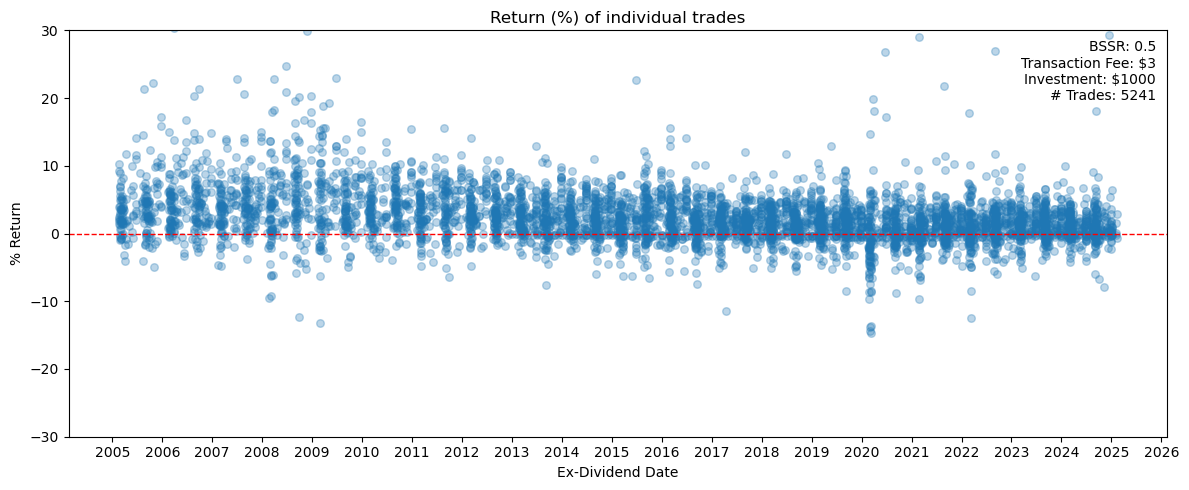

In [240]:
# Ensure the ex_div_date is in datetime format
results_trades_ax['ex_div_date'] = pd.to_datetime(results_trades_ax['ex_div_date'])

# Sort the DataFrame by ex_div_date to have a chronological order
df_trade_summary = results_trades_ax.sort_values(by='ex_div_date')

plot_trade_scatter(data=df_trade_summary, ylim=(-30, 30), 
                   bssr=bssr, trading_fee=trading_fee, investment=investment, 
                   marker_size=30, alpha=0.3)


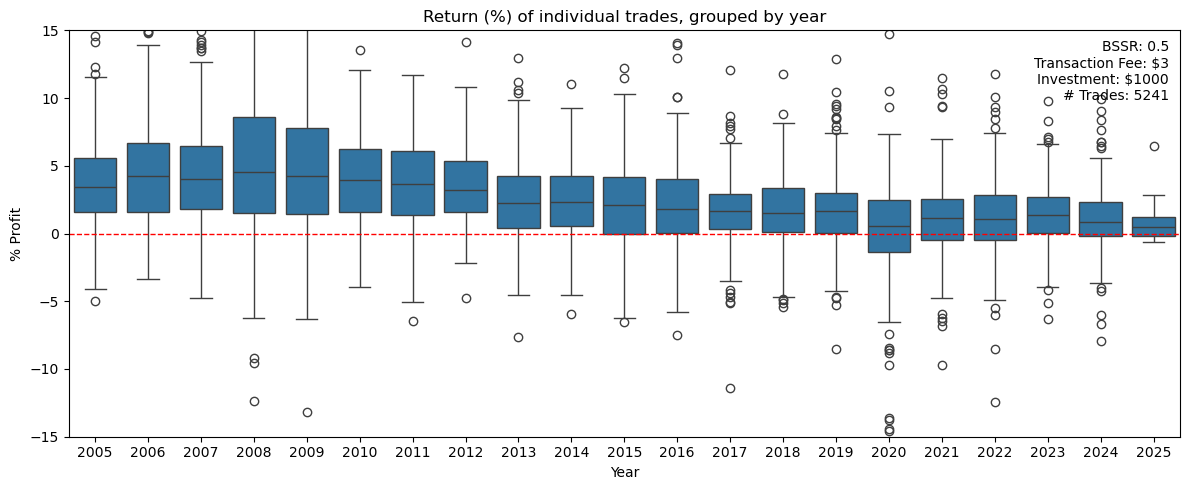

In [241]:
plot_yearly_boxplot(data=results_trades_ax, ylim=(-15, 15), bssr=bssr, trading_fee=trading_fee, investment=investment)

In [162]:
axjo = pd.read_csv('../data/asx200_axjo_index.csv')
axjo.head()

Date         Open         High          Low        Close  \
0  2005-02-13 13:00:00  4180.200195  4190.500000  4142.500000  4150.200195   
1  2005-02-14 13:00:00  4150.299805  4159.299805  4140.700195  4144.799805   
2  2005-02-15 13:00:00  4156.600098  4169.100098  4146.299805  4151.700195   
3  2005-02-16 13:00:00  4157.500000  4172.100098  4150.299805  4166.899902   
4  2005-02-17 13:00:00  4164.700195  4169.500000  4152.899902  4163.600098   

   Volume  Dividends  Stock Splits  
0       0        0.0           0.0  
1       0        0.0           0.0  
2       0        0.0           0.0  
3       0        0.0           0.0  
4       0        0.0           0.0

In [242]:
plot_vintage_analysis_plotly(results_trades_ax, initial_investment=investment, min_year=2016, max_year=2024)

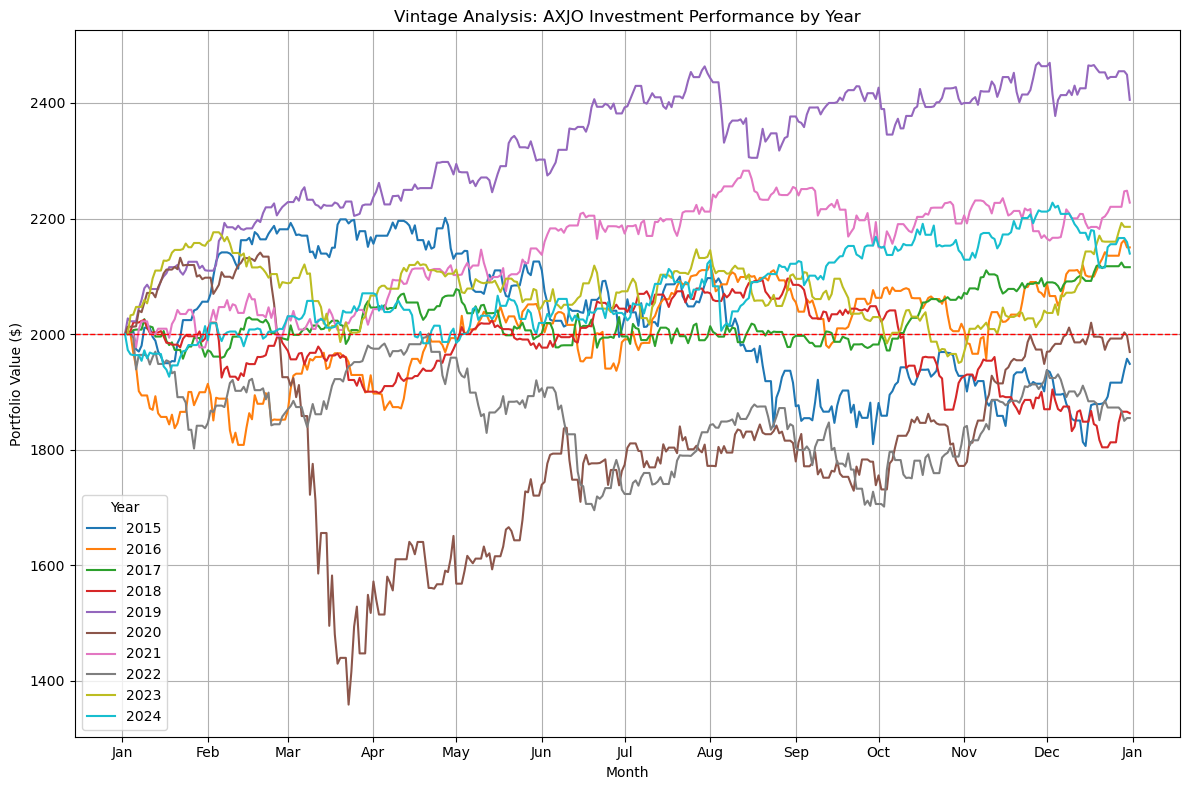

In [243]:
plot_axjo_vintage(axjo_df=axjo, initial_investment=2000, min_year=2015, max_year=2024)

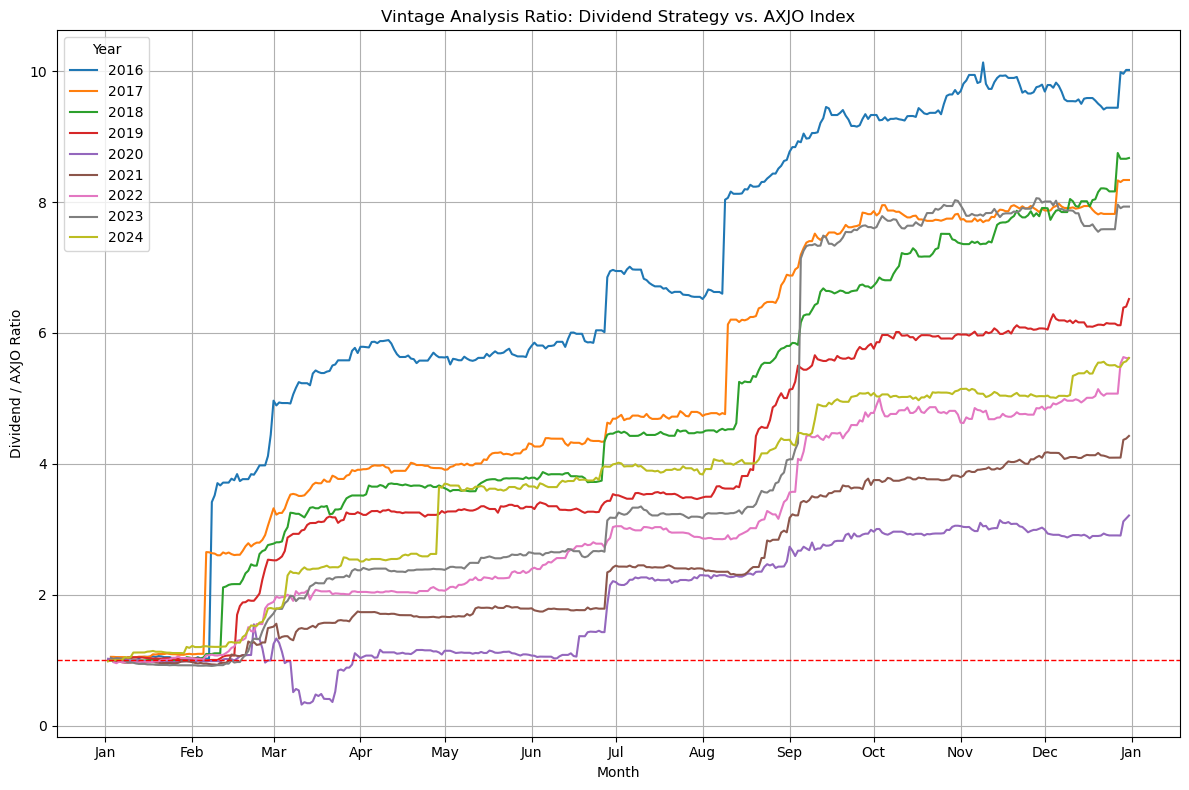

In [247]:
plot_vintage_ratio(trade_df=results_trades_ax,
                   axjo_df=axjo,
                   initial_investment_div=investment,
                   initial_investment_ax=investment,
                   min_year=2016,
                   max_year=2024)

In [252]:
plot_event_overlap_with_positions(results_trades_ax)

In [ ]:
results_profit_nzx, results_pct_nzx, results_trades_nzx = cal_div_harvest(nzx50_tickers, period="20y")

['FPH.NZ', 'MEL.NZ', 'AIA.NZ', 'IFT.NZ', 'MCY.NZ', 'EBO.NZ', 'CEN.NZ', 'MFT.NZ', 'SPK.NZ', 'ATM.NZ', 'POT.NZ', 'VCT.NZ', 'CNU.NZ', 'GMT.NZ', 'FBU.NZ', 'SUM.NZ', 'RYM.NZ', 'GNE.NZ', 'AIR.NZ', 'PCT.NZ', 'FRW.NZ', 'MNW.NZ', 'KPG.NZ', 'GTK.NZ', 'VHP.NZ', 'WBC.NZ', 'PFI.NZ', 'SKC.NZ', 'HGH.NZ', 'VSL.NZ', 'SKL.NZ', 'ANZ.NZ', 'ARG.NZ', 'VGL.NZ', 'CHI.NZ', 'SPG.NZ', 'SCL.NZ', 'OCA.NZ', 'FSF.NZ', 'TWR.NZ', 'HLG.NZ', 'NZX.NZ', 'TRA.NZ', 'SAN.NZ', 'SKO.NZ', 'IPL.NZ', 'THL.NZ', 'SKT.NZ', 'WHS.NZ', 'KMD.NZ']
Data saved to data/nzx50_data.csv.


/tmp/ipykernel_4547/3975602865.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


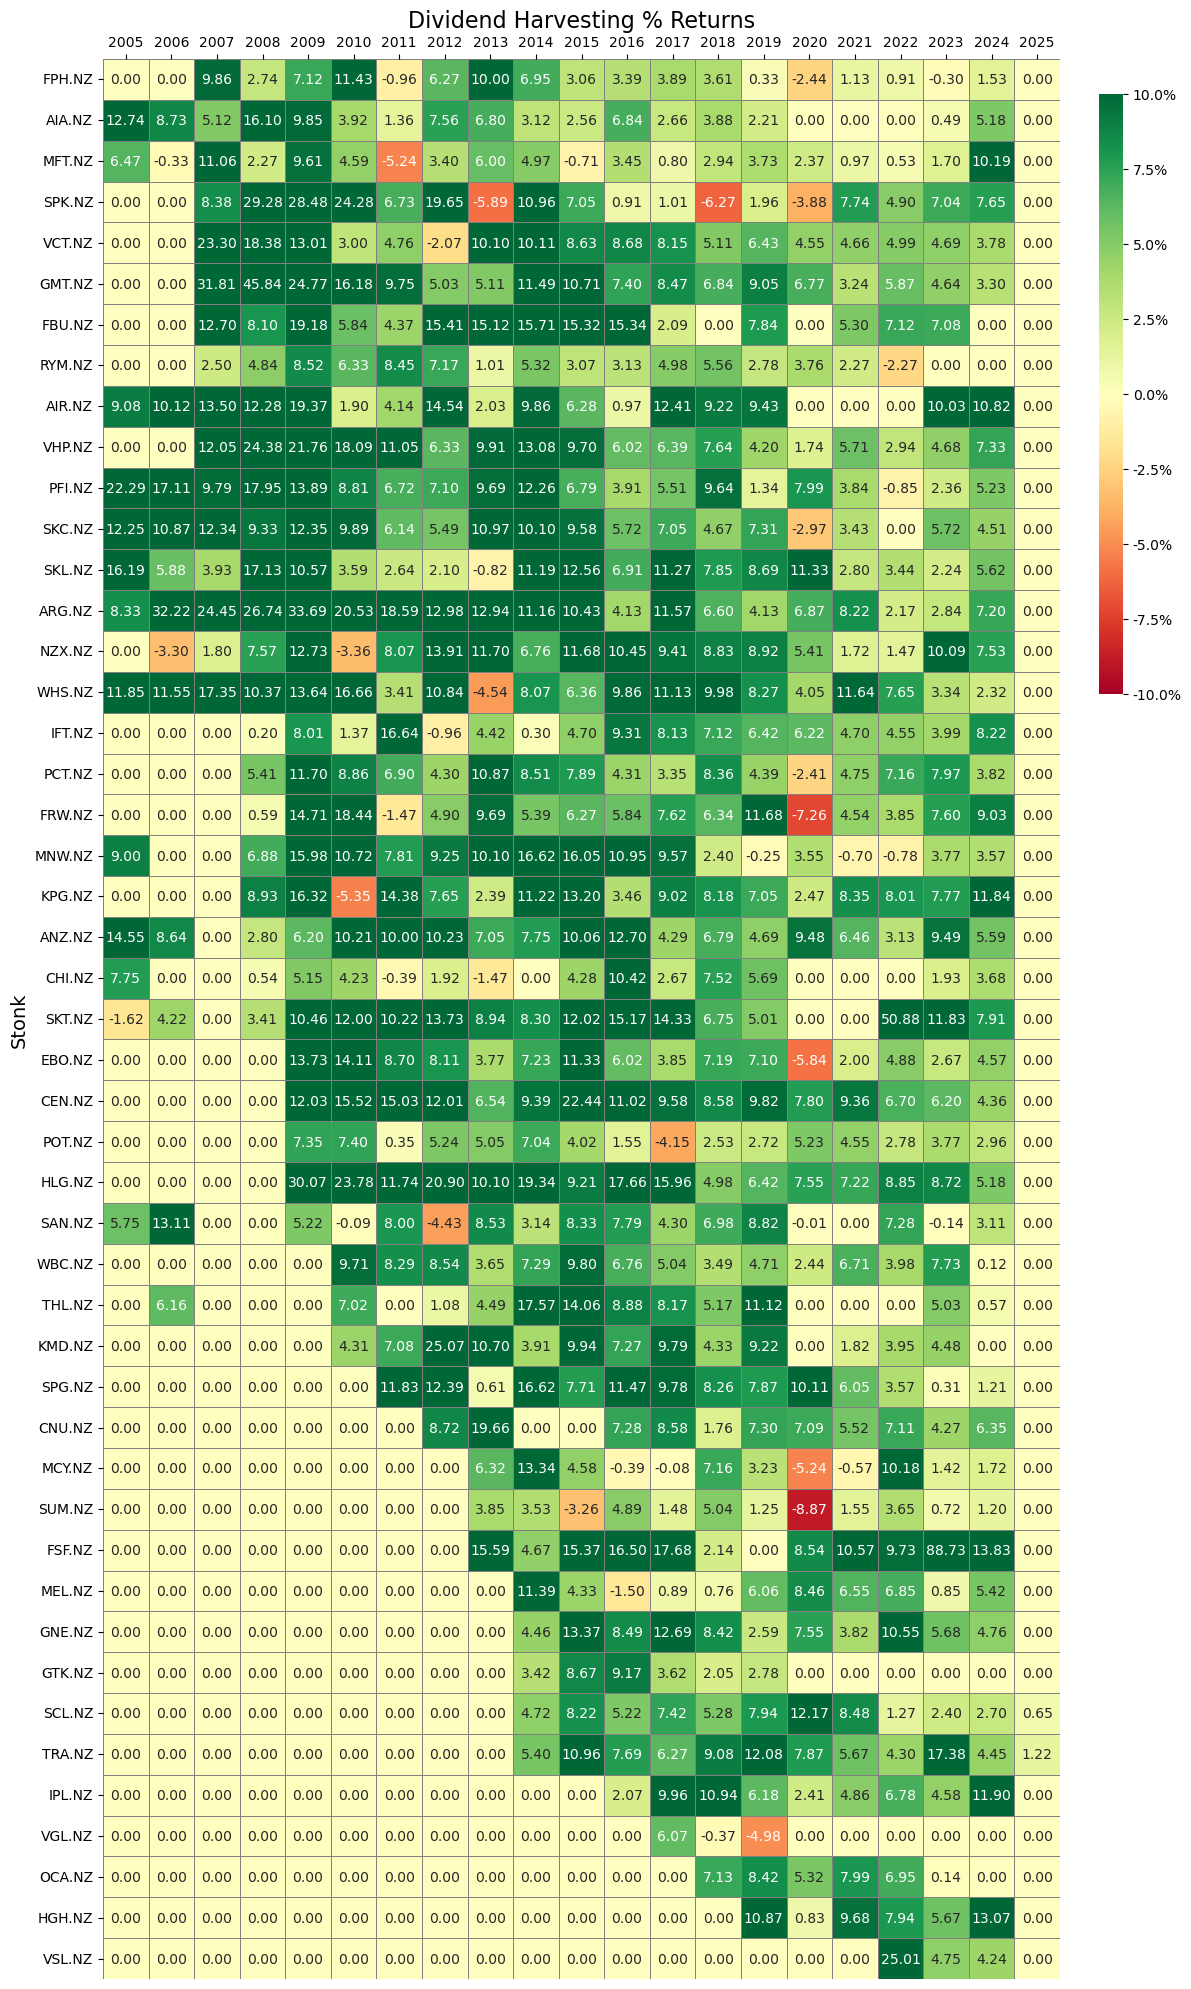

In [161]:
plot_heatmap(df=results_pct, figsize=(12, 20))

In [138]:
results_pct

2005       2006       2007       2008       2009       2010  \
FPH.NZ   0.000000   0.000000   9.861281   2.737847   7.122869  11.426522   
AIA.NZ  12.737572   8.728905   5.123317  16.099115   9.845746   3.924174   
MFT.NZ   6.470813  -0.329498  11.059488   2.271822   9.610176   4.585397   
SPK.NZ   0.000000   0.000000   8.377905  29.275738  28.484353  24.283953   
VCT.NZ   0.000000   0.000000  23.295916  18.380020  13.006152   2.996174   
GMT.NZ   0.000000   0.000000  31.810538  45.841499  24.765643  16.183004   
FBU.NZ   0.000000   0.000000  12.699934   8.097453  19.177429   5.843385   
RYM.NZ   0.000000   0.000000   2.498895   4.839520   8.519630   6.325447   
AIR.NZ   9.080749  10.122319  13.502858  12.283311  19.369626   1.901837   
VHP.NZ   0.000000   0.000000  12.052293  24.378804  21.763296  18.090218   
PFI.NZ  22.293820  17.114531   9.787503  17.945473  13.892569   8.812750   
SKC.NZ  12.248994  10.865338  12.344412   9.334392  12.349483   9.885200   
SKL.NZ  16.186144   5.884541   3.931721  17.126221  10.566500   3.592691   
ARG.NZ   8.333776  32.216298  24.448912  26.739880  33.687937  20.529207   
NZX.NZ   0.000000  -3.302815   1.803015   7.572840  12.729247  -3.359987   
WHS.NZ  11.849215  11.548210  17.351801  10.372172  13.643577  16.656002   
IFT.NZ   0.000000   0.000000   0.000000   0.202155   8.010779   1.365032   
PCT.NZ   0.000000   0.000000   0.000000   5.407035  11.697124   8.859233   
FRW.NZ   0.000000   0.000000   0.000000   0.592513  14.711091  18.437411   
MNW.NZ   9.000156   0.000000   0.000000   6.879252  15.977744  10.718670   
KPG.NZ   0.000000   0.000000   0.000000   8.926695  16.315463  -5.351837   
ANZ.NZ  14.549020   8.636416   0.000000   2.802830   6.197407  10.206023   
CHI.NZ   7.753736   0.000000   0.000000   0.543056   5.153737   4.231284   
SKT.NZ  -1.618048   4.216668   0.000000   3.405038  10.462810  12.002611   
EBO.NZ   0.000000   0.000000   0.000000   0.000000  13.728938  14.107797   
CEN.NZ   0.000000   0.000000   0.000000   0.000000  12.029495  15.519020   
POT.NZ   0.000000   0.000000   0.000000   0.000000   7.347486   7.398510   
HLG.NZ   0.000000   0.000000   0.000000   0.000000  30.067165  23.778816   
SAN.NZ   5.745363  13.106667   0.000000   0.000000   5.217677  -0.093585   
WBC.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   9.706830   
THL.NZ   0.000000   6.158723   0.000000   0.000000   0.000000   7.019197   
KMD.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   4.306437   
SPG.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
CNU.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
MCY.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
SUM.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
FSF.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
MEL.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
GNE.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
GTK.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
SCL.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
TRA.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
IPL.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
VGL.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
OCA.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
HGH.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
VSL.NZ   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

             2011       2012       2013       2014  ...       2016       2017  \
FPH.NZ  -0.961079   6.269780  10.001547   6.946937  ...   3.387544   3.885525   
AIA.NZ   1.357060   7.556847   6.801555   3.115572  ...   6.839170   2.659090   
MFT.NZ  -5.235814   3.400166   5.996575   4.965349  ...   3.449516   0.795116   
SPK.NZ   6.729016  19.650249  -5.891340 

In [139]:
results_pct.to_csv("nzx50results.csv", index=True)

In [ ]:
# List of ASX200 tickers
asx = pd.read_csv('data/asx200.csv')
asx200_tickers = asx['ticker'].tolist()

results_profit_ax, results_pct_ax, results_trades_ax = cal_div_harvest(asx200_tickers, period="20y")


Processing A2M.AX...
  No dividend events for A2M.AX.
Processing AAA.AX...
Processing ABC.AX...


$ABC.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for ABC.AX.
Processing ABP.AX...


$ABP.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for ABP.AX.
Processing AFI.AX...
Processing AGL.AX...
Processing AIA.AX...
Processing ALD.AX...
Processing ALL.AX...
Processing ALQ.AX...
Processing ALU.AX...


$ALU.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for ALU.AX.
Processing ALX.AX...
Processing AMC.AX...
Processing AMP.AX...
Processing ANN.AX...
Processing ANZ.AX...
Processing APA.AX...
Processing APE.AX...
Processing APT.AX...


$APT.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for APT.AX.
Processing APX.AX...
Processing ARB.AX...
Processing ARG.AX...
Processing AST.AX...


$AST.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for AST.AX.
Processing ASX.AX...
Processing AWC.AX...


$AWC.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for AWC.AX.
Processing AZJ.AX...
Processing BAP.AX...
Processing BEN.AX...
Processing BGA.AX...
Processing BHP.AX...
Processing BIN.AX...


$BIN.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for BIN.AX.
Processing BKW.AX...
Processing BLD.AX...


$BLD.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for BLD.AX.
Processing BOQ.AX...
Processing BPT.AX...
Processing BRG.AX...
Processing BSL.AX...
Processing BWP.AX...
Processing BXB.AX...
Processing CAR.AX...
Processing CBA.AX...
Processing CCL.AX...
  No dividend events for CCL.AX.
Processing CCP.AX...
Processing CDA.AX...
Processing CGF.AX...
Processing CHC.AX...
Processing CHN.AX...
  No dividend events for CHN.AX.
Processing CIA.AX...
Processing CIM.AX...


$CIM.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for CIM.AX.
Processing CLW.AX...
Processing CMW.AX...
Processing CNU.AX...
Processing COH.AX...
Processing COL.AX...
Processing CPU.AX...
Processing CQR.AX...
Processing CSL.AX...
Processing CSR.AX...


$CSR.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for CSR.AX.
Processing CTD.AX...
Processing CWN.AX...


$CWN.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for CWN.AX.
Processing CWY.AX...
Processing DEG.AX...
  No dividend events for DEG.AX.
Processing DHG.AX...
Processing DMP.AX...
Processing DOW.AX...
Processing DRR.AX...
Processing DXS.AX...
Processing EBO.AX...
Processing ELD.AX...
Processing EML.AX...
  No dividend events for EML.AX.
Processing EVN.AX...
Processing EVT.AX...
Processing FBU.AX...
Processing FLT.AX...
Processing FMG.AX...
Processing FPH.AX...
Processing GMG.AX...
Processing GNE.AX...
Processing GOZ.AX...
Processing GPT.AX...
Processing GXY.AX...


$GXY.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for GXY.AX.
Processing HLS.AX...
Processing HVN.AX...
Processing IAG.AX...
Processing IEL.AX...
Processing IFL.AX...
Processing IFT.AX...
Processing IGO.AX...
Processing ILU.AX...
Processing IOO.AX...
Processing IOZ.AX...
Processing IPL.AX...
Processing IRE.AX...
Processing IVV.AX...
Processing JBH.AX...
Processing JHX.AX...
Processing LFG.AX...
Processing LFS.AX...
Processing LLC.AX...
Processing LNK.AX...


$LNK.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for LNK.AX.
Processing LYC.AX...
  No dividend events for LYC.AX.
Processing MCY.AX...
Processing MEZ.AX...
  Negative buy price encountered for MEZ.AX on 2014-03-26 00:00:00+11:00 (-3.1577785015106206). Removing ticker from results.
Processing MFG.AX...
Processing MGF.AX...


$MGF.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for MGF.AX.
Processing MGOC.AX...
Processing MGR.AX...
Processing MIN.AX...
Processing MLT.AX...


$MLT.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for MLT.AX.
Processing MP1.AX...
  No dividend events for MP1.AX.
Processing MPL.AX...
Processing MQG.AX...
Processing MTS.AX...
Processing NAB.AX...
Processing NCM.AX...


$NCM.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for NCM.AX.
Processing NEC.AX...
Processing NHF.AX...
Processing NIC.AX...
Processing NSR.AX...
Processing NST.AX...
Processing NUF.AX...
Processing NWL.AX...
Processing NXT.AX...
  No dividend events for NXT.AX.
Processing ORA.AX...
Processing ORE.AX...


$ORE.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for ORE.AX.
Processing ORG.AX...
Processing ORI.AX...
Processing OSH.AX...


$OSH.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for OSH.AX.
Processing OZL.AX...


$OZL.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for OZL.AX.
Processing PBH.AX...
Processing PDL.AX...


$PDL.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for PDL.AX.
Processing PLS.AX...
Processing PME.AX...
Processing PMGOLD.AX...
  No dividend events for PMGOLD.AX.
Processing PMV.AX...
Processing PNI.AX...
Processing PNV.AX...
  No dividend events for PNV.AX.
Processing PPT.AX...
Processing PTM.AX...
Processing QAN.AX...
Processing QBE.AX...
Processing QUB.AX...
Processing REA.AX...
Processing REH.AX...
Processing RHC.AX...
Processing RIO.AX...
Processing RMD.AX...
Processing RRL.AX...
Processing RWC.AX...
Processing S32.AX...
Processing SCG.AX...
Processing SCP.AX...
  No dividend events for SCP.AX.
Processing SDF.AX...
Processing SEK.AX...
Processing SGM.AX...
Processing SGP.AX...
Processing SGR.AX...
Processing SHL.AX...
Processing SKC.AX...
Processing SKI.AX...


$SKI.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for SKI.AX.
Processing SLK.AX...


$SLK.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for SLK.AX.
Processing SNZ.AX...
Processing SOL.AX...
Processing SPK.AX...
Processing STO.AX...
Processing STW.AX...
Processing SUL.AX...
Processing SUN.AX...
Processing SVW.AX...


$SVW.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for SVW.AX.
Processing SYD.AX...


$SYD.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for SYD.AX.
Processing TAH.AX...
Processing TCL.AX...
Processing TLS.AX...
Processing TLT.AX...


$TLT.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for TLT.AX.
Processing TNE.AX...
Processing TPG.AX...
Processing TWE.AX...
Processing TYR.AX...
  No dividend events for TYR.AX.
Processing VAP.AX...
Processing VAS.AX...
Processing VCX.AX...
Processing VEA.AX...
Processing VEU.AX...
Processing VGS.AX...
Processing VOC.AX...


$VOC.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for VOC.AX.
Processing VTS.AX...
Processing VUK.AX...


$VUK.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for VUK.AX.
Processing WAM.AX...
Processing WBC.AX...
Processing WEB.AX...
Processing WES.AX...
Processing WOR.AX...
Processing WOW.AX...
Processing WPL.AX...


$WPL.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for WPL.AX.
Processing WPR.AX...
Processing WTC.AX...
Processing XRO.AX...
  No dividend events for XRO.AX.
Processing YAL.AX...
Processing Z1P.AX...


$Z1P.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


  No historical data for Z1P.AX.
Processing ZIM.AX...


AttributeError: 'dict' object has no attribute 'to_csv'

In [151]:
results_pct_ax.to_csv("outputs/asx200_pct_results.csv", index=True)
results_profit_ax.to_csv("outputs/asx200_profit_results.csv", index=True)

# Create an empty list to store all trade dictionaries
all_trades = []

# Loop over each ticker and its list of trades in the dictionary
for ticker, trades in results_trades_ax.items():
    for trade in trades:
        # Add a new key-value pair to record which ticker the trade belongs to
        trade['ticker'] = ticker
        all_trades.append(trade)

# Convert the list of trade dictionaries into a DataFrame
df_trades = pd.DataFrame(all_trades)

# Save the DataFrame to a CSV file
df_trades.to_csv('outputs/asx200_trades.csv', index=False)

/tmp/ipykernel_4547/3975602865.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


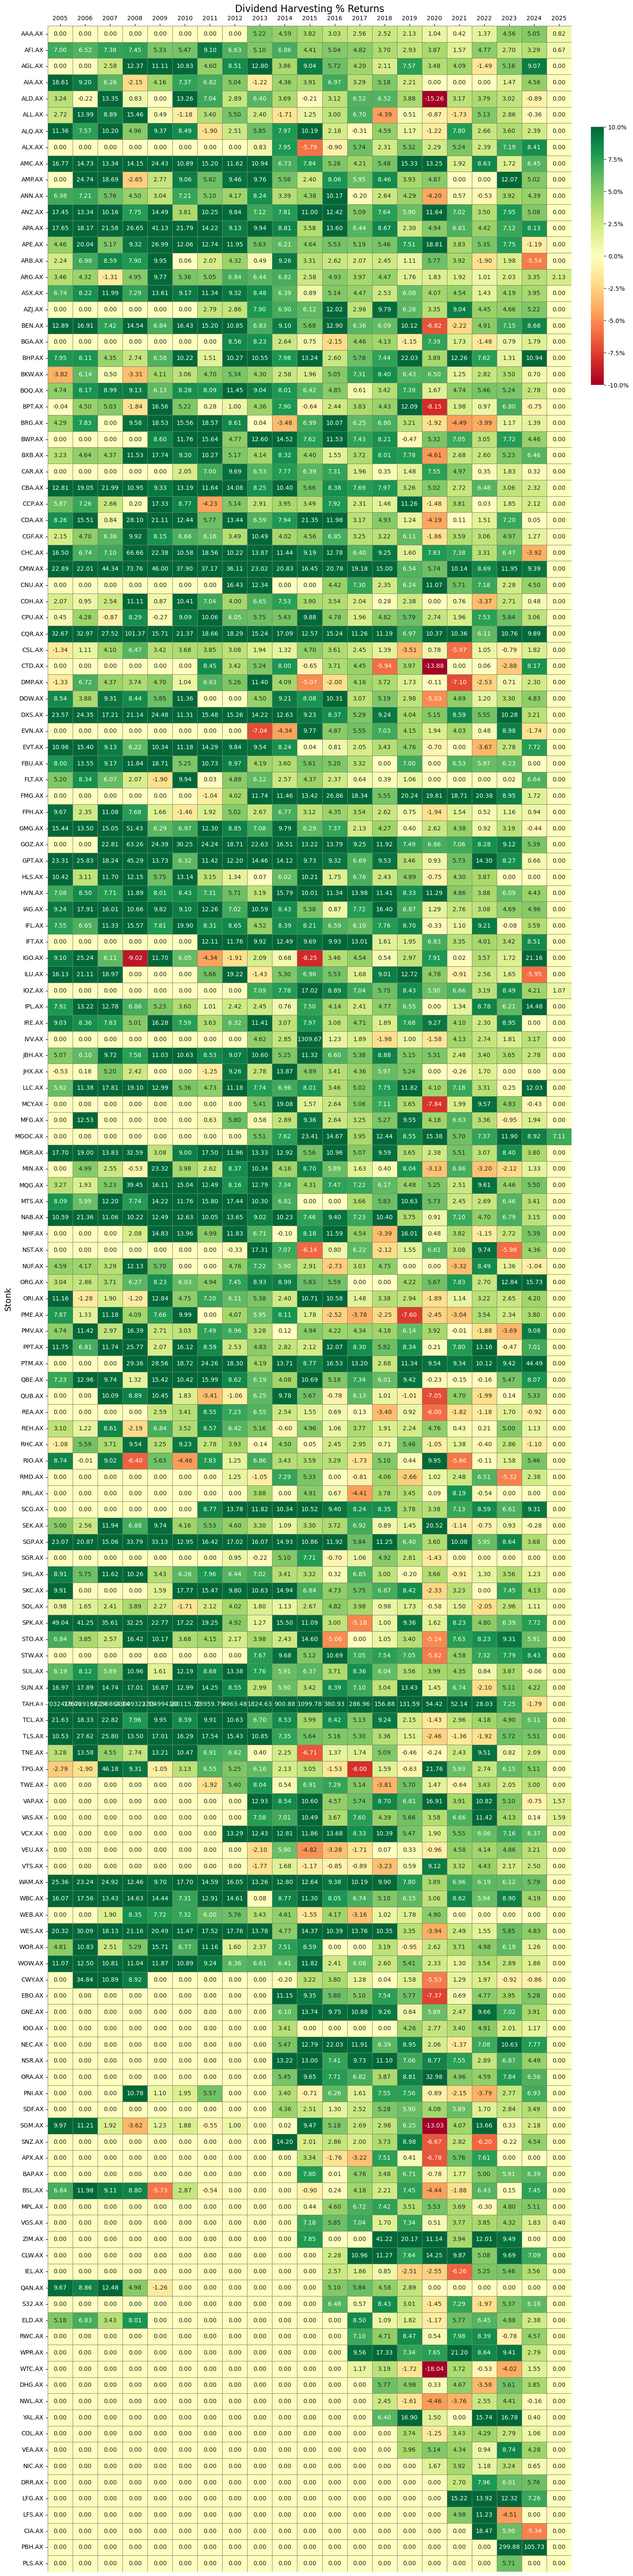

In [162]:
plot_heatmap(df=results_pct_ax, figsize=(15, 60))